# 회귀 트리

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

C:\Users\river\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
boston=load_boston()

boston_df=pd.DataFrame(data=boston.data, columns=boston.feature_names)
boston_df['price']=boston.target

boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
X=boston_df.drop('price',axis=1)
y=boston_df['price']

In [5]:
rf_reg=RandomForestRegressor(random_state=0, n_estimators=1000)
neg_mse_scores=cross_val_score(rf_reg, X,y, scoring='neg_mean_squared_error', cv=5)
rmse_scores=np.sqrt(-1*neg_mse_scores)
avg_rmse=np.mean(rmse_scores)

In [7]:
print('5 교차 검증의 개별 Negative MSE scores : ',np.round(neg_mse_scores,2))
print('5 교차 검증의 개별 RMSE scores : ',np.round(rmse_scores,2))
print('5 교차 검증의 평균 RMSE : ',np.round(avg_rmse,3))

5 교차 검증의 개별 Negative MSE scores :  [ -7.88 -13.14 -20.57 -46.23 -18.88]
5 교차 검증의 개별 RMSE scores :  [2.81 3.63 4.54 6.8  4.34]
5 교차 검증의 평균 RMSE :  4.423


In [10]:
def get_model_cv_prediction(model, features, target):
    neg_mse_scores=cross_val_score(model, features, target, scoring='neg_mean_squared_error', cv=5)
    avg_rmse=np.mean(np.sqrt(-1*neg_mse_scores))
    
    print('#### ',model.__class__.__name__,' ####')
    print('5 교차 검증의 평균 RMSE : {0:.3f}'.format(avg_rmse))

In [11]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

dt_reg=DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg=RandomForestRegressor(random_state=0, n_estimators=1000)
gb_reg=GradientBoostingRegressor(random_state=0, n_estimators=1000)
xgb_reg=XGBRegressor(n_estimators=1000)
lgbm_reg=LGBMRegressor(n_estimators=1000)

models=[dt_reg, rf_reg, gb_reg, xgb_reg, lgbm_reg]

for model in models:
    get_model_cv_prediction(model, X, y)

####  DecisionTreeRegressor  ####
5 교차 검증의 평균 RMSE : 5.978
####  RandomForestRegressor  ####
5 교차 검증의 평균 RMSE : 4.423
####  GradientBoostingRegressor  ####
5 교차 검증의 평균 RMSE : 4.269
####  XGBRegressor  ####
5 교차 검증의 평균 RMSE : 4.251
####  LGBMRegressor  ####
5 교차 검증의 평균 RMSE : 4.646


XGBRegressor 의 성능이 제일 좋음을 볼 수 있다.

회귀 트리의 Regressor 클래스는 선형 회귀와 다른 처리 방식이므로 회귀 계수를 제공하는 coef_ 속성이 없다.

대신 **feature_importances_ 를 이용해 피처별 중요도를 알 수 있다.**

C:\Users\river\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


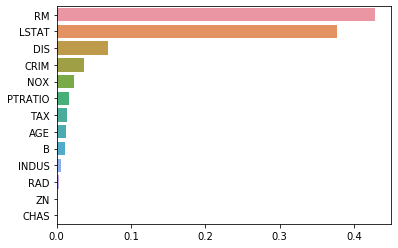

In [12]:
import seaborn as sns
%matplotlib inline

rf_reg=RandomForestRegressor(n_estimators=1000)

rf_reg.fit(X,y)

feature_series=pd.Series(data=rf_reg.feature_importances_, index=X.columns)
feature_series=feature_series.sort_values(ascending=False)

sns.barplot(x=feature_series, y=feature_series.index)

#### 회귀 트리 Regressor 가 어떻게 예측값을 판단하는지 선형 회귀와 비교

(100, 2)


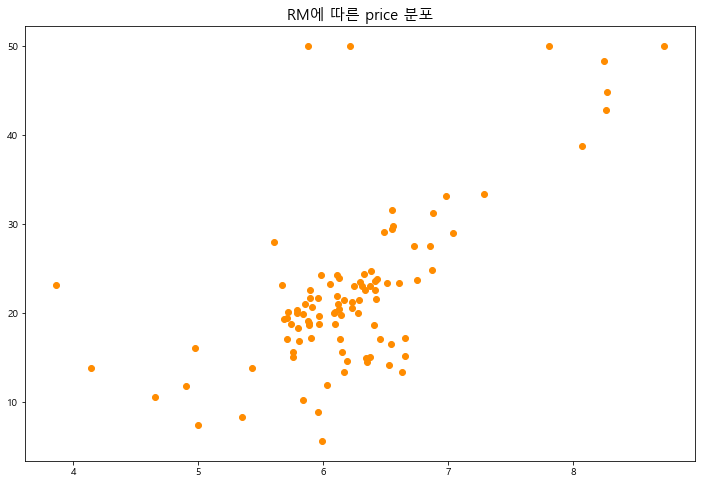

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

boston_sample=boston_df[['RM','price']]
boston_sample=boston_sample.sample(n=100, random_state=0)
print(boston_sample.shape)

plt.figure(figsize=(12,8))
plt.title('RM에 따른 price 분포', fontsize=15)
plt.scatter(boston_sample['RM'], boston_sample['price'], c='darkorange')

In [24]:
from sklearn.linear_model import LinearRegression

lr_reg=LinearRegression()

dt_reg2=DecisionTreeRegressor(max_depth=2)
dt_reg7=DecisionTreeRegressor(max_depth=7)

In [27]:
x_test=np.linspace(4.5, 8.5, 100).reshape(-1,1)

In [28]:
x_features=boston_sample['RM'].values.reshape(-1,1)
y_target=boston_sample['price'].values.reshape(-1,1)

In [30]:
lr_reg.fit(x_features, y_target)
dt_reg2.fit(x_features, y_target)
dt_reg7.fit(x_features, y_target)

DecisionTreeRegressor(max_depth=7)

In [31]:
pred_lr=lr_reg.predict(x_test)
pred_dt_reg2=dt_reg2.predict(x_test)
pred_dt_reg7=dt_reg7.predict(x_test)

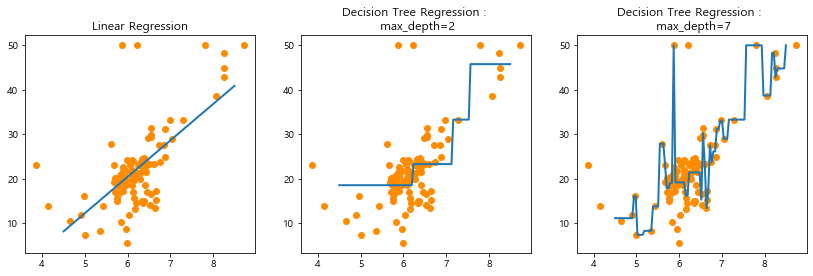

In [33]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(14,4), ncols=3)

ax1.set_title('Linear Regression')
ax1.scatter(boston_sample['RM'], boston_sample['price'], c='darkorange')
ax1.plot(x_test, pred_lr, label='linear', linewidth=2)

ax2.set_title('Decision Tree Regression : \n max_depth=2')
ax2.scatter(boston_sample['RM'], boston_sample['price'], c='darkorange')
ax2.plot(x_test, pred_dt_reg2, label='max_depth:2', linewidth=2)

ax3.set_title('Decision Tree Regression : \n max_depth=7')
ax3.scatter(boston_sample['RM'], boston_sample['price'], c='darkorange')
ax3.plot(x_test, pred_dt_reg7, label='max_detph:7', linewidth=2)

DecisionTree regressor 는 깊이가 깊을 수록 복잡한 계단 형태의 회귀선을 만들어 과적합의 위험이 있다.